## Analyzing EIA Electricity Data

The U.S. Energy Information Agency has Annual Electric Power Industry data spanning from 1990 to 2016. The data can be found here:

https://www.eia.gov/electricity/data/eia861/

The Data Analyst should use at least the 2016 dataset to answer the questions. The creativity of how you explore the data, present it, and analyze it will be key. Providing aditional analysis based on your background will be a huge plus.

Please provide all the python code used to answer the questions.

<hr/>
## Dynamic Electricity Pricing

Some questions may require no data analysis (only research), while others may require both.

1) Which U.S. states have deregulated retail electricity markets?

2) Which U.S. states have the most power utilities utilizing dynamic pricing?

3) Which states have the most enrolled customers in dynamic pricing?

1) Which U.S. states have deregulated retail electricity markets?

Regulated electricity markets are vertically ingrated by utility companies, which control the entire value chain. Deregulated markets allow other participants to own power plants and transmission lines. In deregulated markets, generators sell electricity into a wholesale market, and retail energy suppliers purchase electricity, and sell it to customers. Local utilities may still operate the transmission grid. All of the parties in the marketplace are are managed by an independent system operator (ISO) or a regional transmission organization (RTO).

States with deregulated elecricity markets include:

California
Connecticut
Delaware
Illinois
Maine
Maryland
Massachusetts
Michigan
New Hampshire
New Jersey
New York
Ohio
Oregon
Pennsylania
Rhode Island
Texas
Virginia
Washington D.C.

Sources: 

https://www.electricchoice.com/map-deregulated-energy-markets/
https://infocastinc.com/insights/solar/regulated-deregulated-energy-markets/

2. Which U.S. states have the most power utilities utilizing dynamic pricing?

Dynamic Pricing Programs are designed to modify patterns of electricity usage, including the timing and level of electricity demand. EIA respondents report customers that are enrolled in the program and are billed accordingly whether or not they are active participants, for each state, balancing authority, and customer sector.

The following code analyzes the number of utilities utilizing dynamic pricing per state in 2016 using the Dynamic_Pricing file.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

def utilities_by_state(dynamic_file):
    
    dynamic_pricing = pd.read_csv(dynamic_file)
    state_list = dynamic_pricing.State.unique()
    num_utilities = []
    
    for state in state_list:
        
        state_df = dynamic_pricing[dynamic_pricing.State.isin([state])]
        number_unique = state_df["Utility Name"].nunique()
        num_utilities.append(number_unique)
    
    state_utility_df = pd.DataFrame(
        {"state": state_list,
         "num_utilities":num_utilities})
    
    state_utility_sorted = state_utility_df.sort_values("num_utilities",
                                                       ascending = False)

    # Plot the figure.
    sns.set()
    plt.figure(figsize=(12, 8))
    ax = state_utility_sorted.num_utilities.plot(kind='bar')
    ax.set_title('Power Utilities Utilizing Dynamic Pricing by State')
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Utilities')
    ax.set_xticklabels(state_utility_sorted.state)

    rects = ax.patches
    
    for rect, utility_num in zip(rects, state_utility_sorted.num_utilities):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, utility_num,
            ha='center', va='bottom')

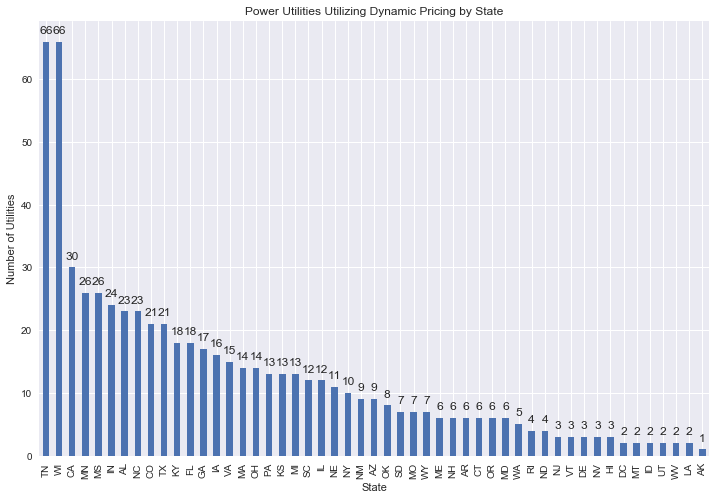

In [100]:
utilities_by_state("2016_eia_data/Dynamic_Pricing2016.csv")

3) Which states have the most enrolled customers in dynamic pricing?

In [277]:
def customers_by_state(dynamic_file):
    
    dynamic_pricing = pd.read_csv(dynamic_file)
    
    #pandas object to number
    
    dynamic_pricing["Total"] = dynamic_pricing["Total"].astype(str).str.replace(",", "").astype(int)
    
    dynamic_pricing["total_by_state"] = dynamic_pricing["Total"].groupby(dynamic_pricing["State"]).transform("sum")
    
    dynamic_pricing_sorted = dynamic_pricing.sort_values("total_by_state",
                                                       ascending = False)

    dynamic_df = dynamic_pricing_sorted.drop_duplicates(subset = ["State"], keep = "first")
    
    dynamic_df = dynamic_df.head(20)

    sns.set()
    
    plt.figure(figsize=(12, 8))
    ax = dynamic_df.total_by_state.plot(kind='bar')
    ax.set_title('Customers Utilizing Dynamic Pricing by State')
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Customers')
    ax.set_xticklabels(dynamic_df.State)
    plt.ylim(0, 2250000)

    rects = ax.patches
    
    for rect, utility_customers in zip(rects, dynamic_df.total_by_state):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 10, utility_customers,
            ha='center', va='bottom', rotation = "vertical")

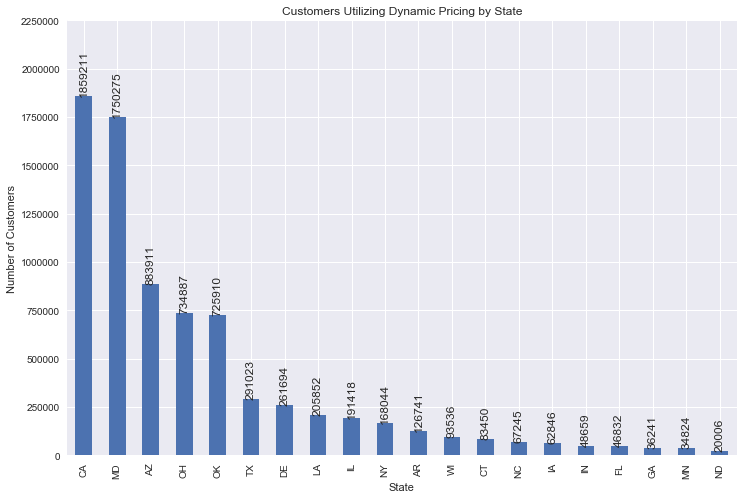

In [278]:
customers_by_state("2016_eia_data/Dynamic_Pricing2016.csv")

<hr/>
## Metering

Some questions may require no data analysis (only research), while others may require both.

1) What policies are leading to more Net Metering customers in Southern California Edison in CA compared to Consolidated Edison in NY?

2) Which utility has the most Net Metering Capacity (MW) by technology?

1) What policies are leading to more Net Metering customers in Southern California Edison in CA compared to Consolidated Edison in NY?

Southern California Edison will have more net metering customers in the future due to Net Metering 2.0, which eliminated "caps" on solar power capacity eligible for net metering. Consolidated Edison, by order of the New York Public Services Commission, will transition from net metering to a Value of Distributed Energy Resource (VDER) tariff for all projects after March 2017, and will cap net metering capacity to no more than 2% of the utility's incremental net annual revenue through 2020.

California's original net metering policy set a cap on net metering capacity in the territories of three companies, including Southern California Edison (SCE). Total solar installations eligible for net metering were capped at 5% of total peak electricity demand. As all three utilities approached their caps in 2015, the California Public Utilities Commission created "Net Metering 2.0", which eliminated the cap, allowing all residential homes to have solar units.

New York implemented caps on net metering, which rose to 6% aggregate capacity in 2014. In response to utilities reaching net metering capacity, the New York Public Service Commission started transitioning away from net metering in favor of a VDER tariff. Net metering projects interconnected prior to March 9, 2017 were allowed to retain their status, and until January 1, 2020, destributed energy resources (DER) eligible for net metering will be compensated by Phase One Net Energy Metering (NEM) and Phase One Value Stack. Edison Consolidated, as a publicly-owned utility is not obligated to offer net metering, but, according to their website, customers can still use the program.

Sources:

https://news.energysage.com/net-metering-2-0-in-california-everything-you-need-to-know/

https://www.sunrun.com/home-solar-blog/6-facts-about-nem-2

https://www.energy.gov/savings/net-metering-23

http://legacyold.coned.com/dg/Net_Metering_Billing_FAQ.asp

http://www.gosolarcalifornia.ca.gov/solar_basics/net_metering.php

2) Which utility has the most Net Metering Capacity (MW) by technology?

I used the Net_Metering_2016 file to answer this question. I decided not to disaggregate between AC and DC photovoltaic technology. I also decided to "groupby" the utility number, rather the utility name. I found several Coop. companies that were listed in multiple rows, in different states. Because they had different numbers, it was likely that they were considered autonomous parts of a larger entity.

I did not use the virtual capacity for photovoltaic because it was a small addition. Without time constraints I would have use it to sum into the total capacity.

In [239]:
energy_types = ["photovoltaic_total_capacity_MW",
               "wind_total_capacity_MW",
               "other_total_capacity_MW",
               "all_tech_total_capacity_MW"]

energy_sums = ["photo_sum",
              "wind_sum",
              "other_sum",
              "all_tech_sum"]

graph_titles = ["Photovoltaic Technology",
               "Wind Technology",
               "Other Alternative Technologies",
               "Total Alternative Technologies"]


def net_metering(net_meter_file):

    net_meter = pd.read_csv(net_meter_file)

    for col_name, new_col, title in zip(energy_types, energy_sums, graph_titles):


        net_meter[col_name] = net_meter[col_name].astype(str).str.replace(",", "").astype(float)

        net_meter[new_col] = net_meter[col_name].groupby(net_meter["Utility Number"]).transform("sum")

        net_meter_sorted = net_meter.sort_values(new_col,
                                                 ascending = False)

        net_meter_df = net_meter_sorted.drop_duplicates(subset = ["Utility Number"], keep = "first")

        net_meter_top = net_meter_df.head(20)

        plt.figure(figsize=(12, 8))
        ax = net_meter_top[new_col].plot(kind='bar')
        ax.set_title('Capacity (MW) of ' + title + ' by Company')
        ax.set_xlabel('Utility Companies')
        ax.set_ylabel('Capacity (MW)')
        ax.set_xticklabels(net_meter_top["Utility Name"])
        plt.ylim(0, (net_meter_df[new_col].iloc[0]+ 0.1*net_meter_df[new_col].iloc[0]))

        rects = ax.patches

        for rect, utility_capacity in zip(rects, net_meter_top[new_col]):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 1, round(utility_capacity, 1),
                ha='center', va='bottom', rotation = "vertical")



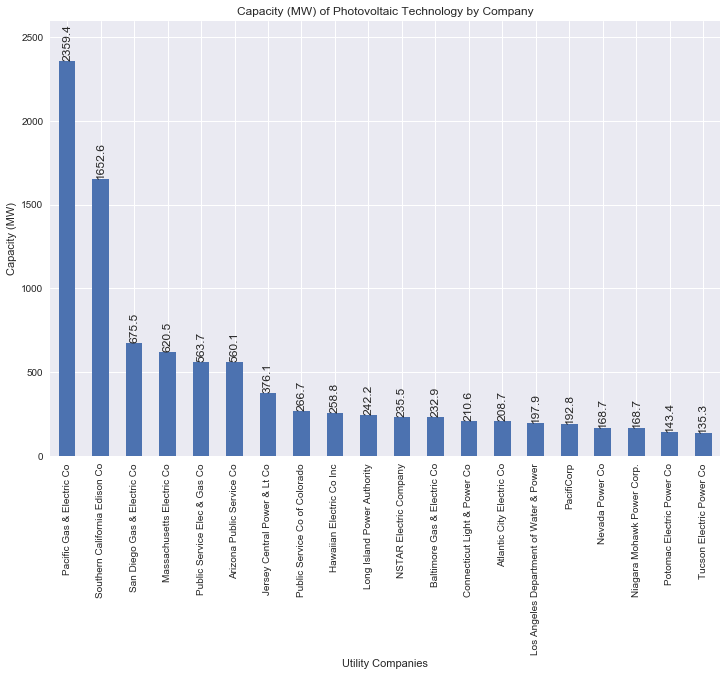

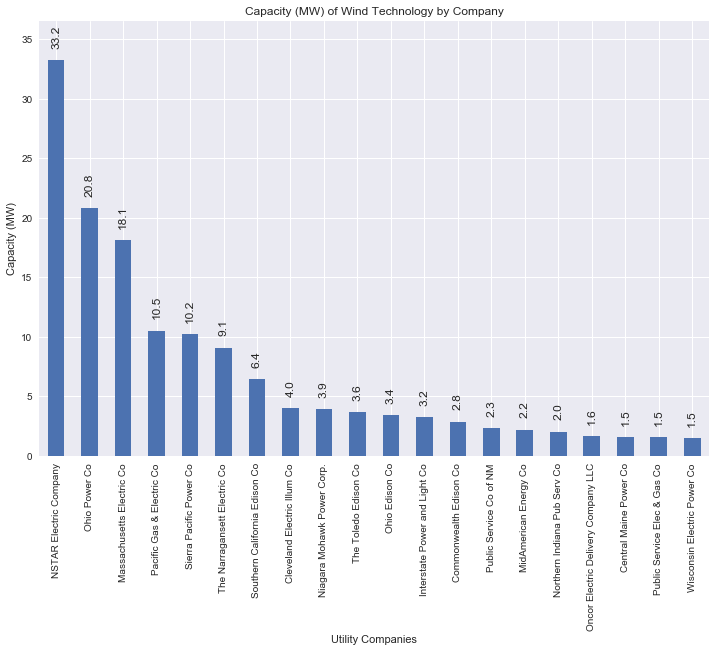

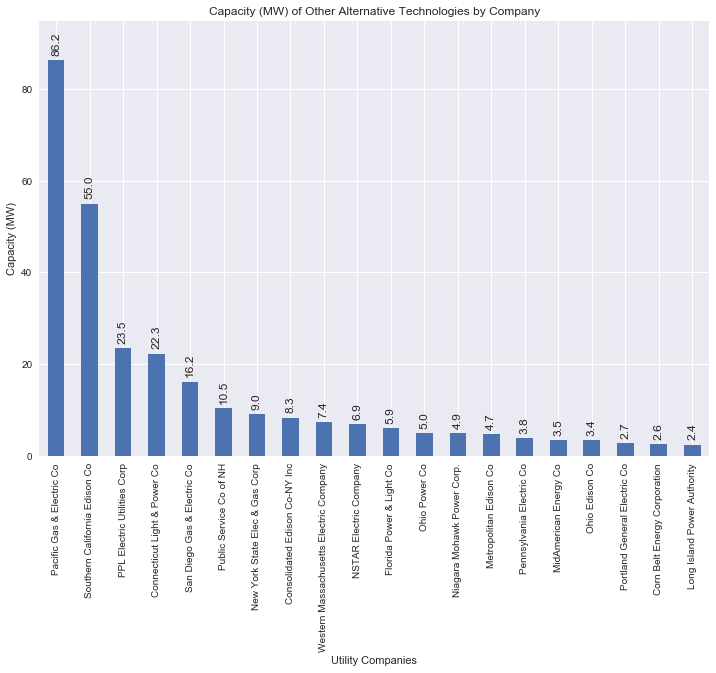

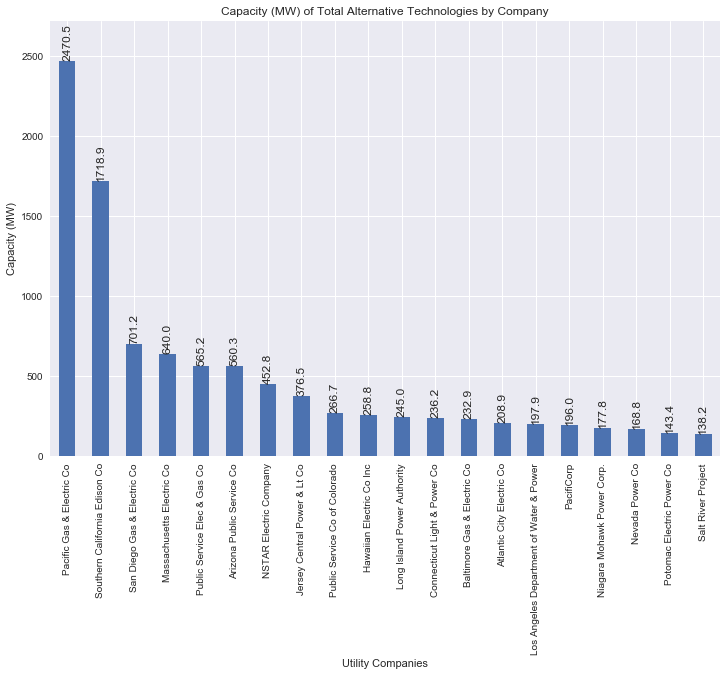

In [240]:
net_metering("2016_eia_data/utility_Net_Metering_2016.csv")

<hr/>
## Electricity Sales

Some questions may require no data analysis (only research), while others may require both.

1) Which Independent System Operator (ISO) (or also known as a Balancing Authority) region has the largest retail electricity sales?

A regional transmission system operator (RTO) is an electric power transmission operator (TSO) which coordinates, controls, and monitors a multi-state electric grid. 

I used the Utility_Data_2016 file to filter for companies in Retail Marketing. I applied groupby to the NERC Region feature based on the text in the Instructions PDF document:

For line 1, please check all of the Regional Entities within the North American Electric Reliability Corporation (NERC), in which your organization conducts operations.

The Regional Entities are:
 TRE (Texas Reliability Entity [ERCOT])
 FRCC (Florida Reliability Coordinating Council)
 MRO (Midwest Reliability Organization)
 NPCC (Northeast Power Coordinating Council)
 RFC (ReliabilityFirst Corporation)
 SERC (SERC Reliability Corporation)
 SPP (Southwest Power Pool, RE)
 WECC (Western Electricity Coordinating Council)

I limited my search to the States (excluded American Samoa Power Authority).

In [275]:
def retail_utility_sales(utility_data_file, sales_file):

    utility_data = pd.read_csv(utility_data_file)
    sales_data = pd.read_csv(sales_file)

    retail_utilities = utility_data[utility_data["Retail Marketing"].isin(["Y"])]
    retail_utilities_slice = retail_utilities[["Utility Number", "Utility Name", "NERC Region","Retail Marketing"]]

    retail_sales = pd.merge(retail_utilities_slice, 
                            sales_data, 
                            how = "left", 
                            on = "Utility Number")

    retail_sales["total_Megawatthours"] = retail_sales["total_Megawatthours"].astype(str).str.replace(",", "").str.replace(".","0").str.replace("nan", "0")

    retail_sales = retail_sales.dropna(subset=['total_Megawatthours', "NERC Region"])

    retail_sales["total_Megawatthours"] = retail_sales["total_Megawatthours"].astype(str).astype(int)

    retail_sales["regional_sales"] = retail_sales["total_Megawatthours"].groupby(retail_sales["NERC Region"]).transform("sum")

    retail_sales_sorted = retail_sales.sort_values("regional_sales", ascending = False)

    retail_sales_df = retail_sales_sorted.drop_duplicates(subset = ["NERC Region"], keep = "first")

    plt.figure(figsize=(12, 8))
    ax = retail_sales_df["regional_sales"].plot(kind='bar')
    ax.set_title('Retail Utility Sales by Region')
    ax.set_xlabel('NERC Region')
    ax.set_ylabel('Megawatthours Sold')
    ax.set_xticklabels(retail_sales_df["NERC Region"])
    plt.ylim(0, (retail_sales_df["regional_sales"].iloc[0]+ 0.2*retail_sales_df["regional_sales"].iloc[0]))

    rects = ax.patches

    for rect, region_sales in zip(rects, retail_sales_df["regional_sales"]):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, region_sales,
            ha='center', va='bottom', rotation = "vertical")

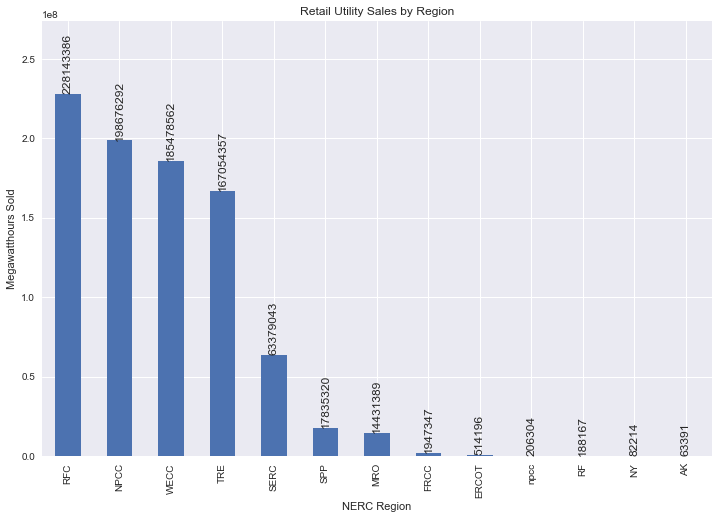

In [276]:
retail_utility_sales("2016_eia_data/Utility_Data_2016.csv", "2016_eia_data/Sales_Ult_Cust_2016.csv")

## Python Question 
Implement the function filter_by_class: It takes a feature matrix, X, an array of classes, y, and a class label, label. It should return all of the rows from X whose label is the given label.

In [133]:
import numpy as np

def filter_by_class(feature_matrix, array_of_classes, class_label_string):
    
    d = []
    for col, col_name in zip(feature_matrix, array_of_classes):
        if col_name == class_label_string:
            d.append(col)
    arr = np.vstack(d)
    
    return arr